# The Sparks Foundation DSE Internship

### Author : Lakshay Kapur

### Task2 : Prediction using Unsupervised Learning

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

In [2]:
# Load the iris dataset
df = pd.read_csv("Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Check the rows and columns
df.shape

(150, 6)

In [4]:
#details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Summary stats for iris dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#check if the data is balanced
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
#Missing value check
df.isnull().sum()/df.shape[0]*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
#Printng columns for reference
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Storing df in another df without target species
df2 = df.loc[:, 'SepalLengthCm':'PetalWidthCm']
#df2 = df2.drop('f2',axis=1)

In [10]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


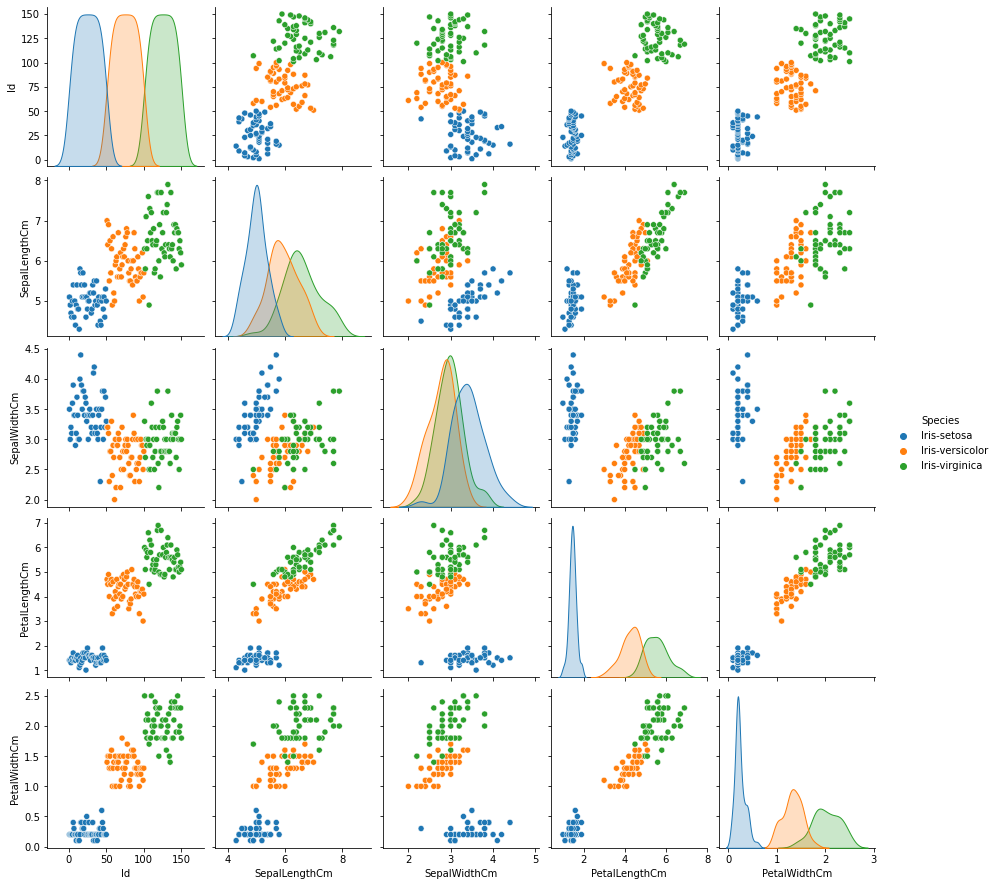

In [11]:
#visualisation of df
sns.pairplot(df,diag_kind='kde',hue='Species')

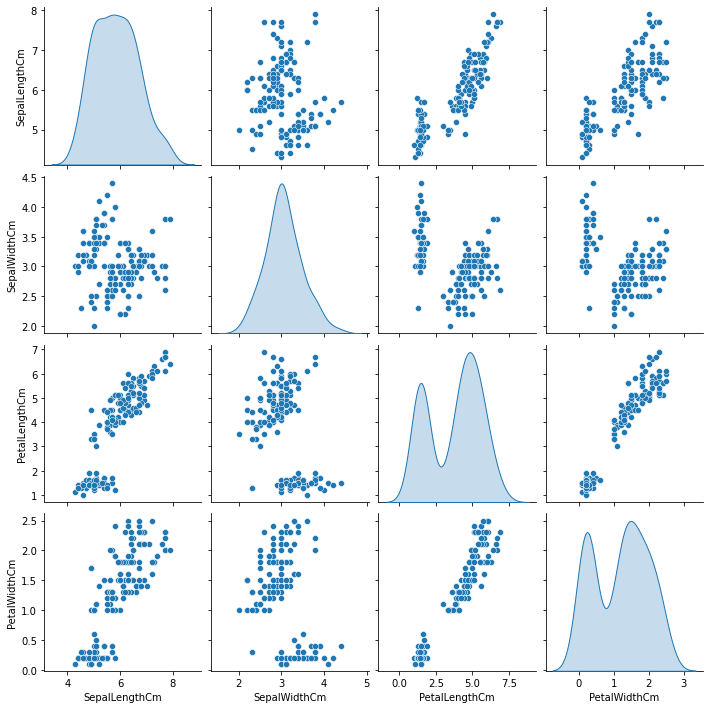

In [12]:
#visualisation of df2
sns.pairplot(df2,diag_kind='kde')

In [15]:
#Scaling is done 
df_scaled = df2.apply(zscore)

In [17]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [18]:
# Finding the optimum number of clusters for k-means classification
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters,n_init = 15, random_state=2)
    clusters.fit(df_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.191970
5,6,80.204334
6,7,72.409561
7,8,63.795006
8,9,54.812011
9,10,47.608553


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

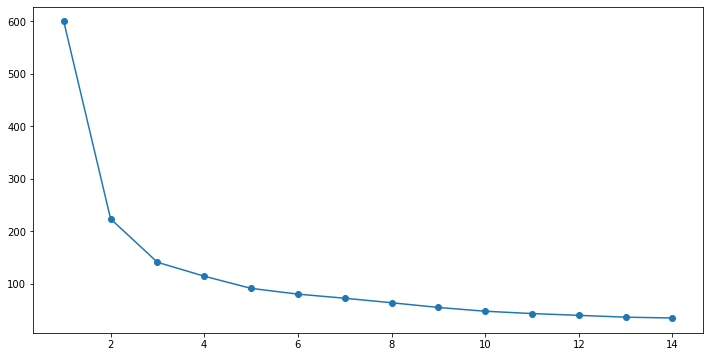

In [19]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

In [21]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [22]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [23]:
centroids=kmeans.cluster_centers_

In [24]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled))

In [25]:
centroid_df #df for centriods 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


In [26]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [27]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [28]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)

In [29]:
kmeans.inertia_ #total sum of squared distance or error for every datapoint

140.96581663074699

In [30]:
finaldf = pd.concat([df0,df1,df2])
finaldf.head() #final df with labels of clusters formed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
50,1.401508,0.337848,0.535296,0.264699,0
51,0.674501,0.337848,0.421564,0.396172,0
52,1.280340,0.106445,0.649027,0.396172,0
56,0.553333,0.569251,0.535296,0.527645,0
65,1.038005,0.106445,0.364699,0.264699,0


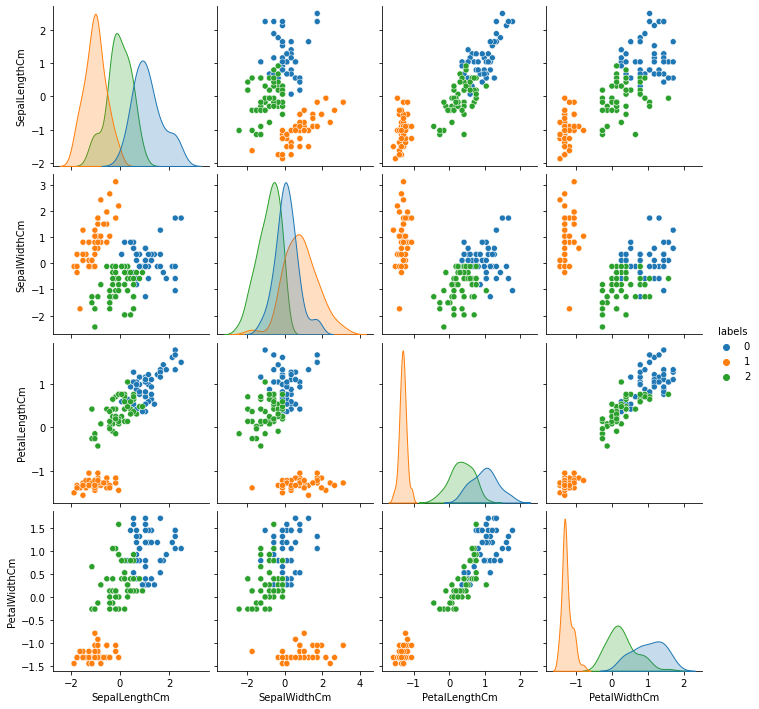

In [31]:
sns.pairplot(finaldf,diag_kind='kde',hue = 'labels') #plotting clusters

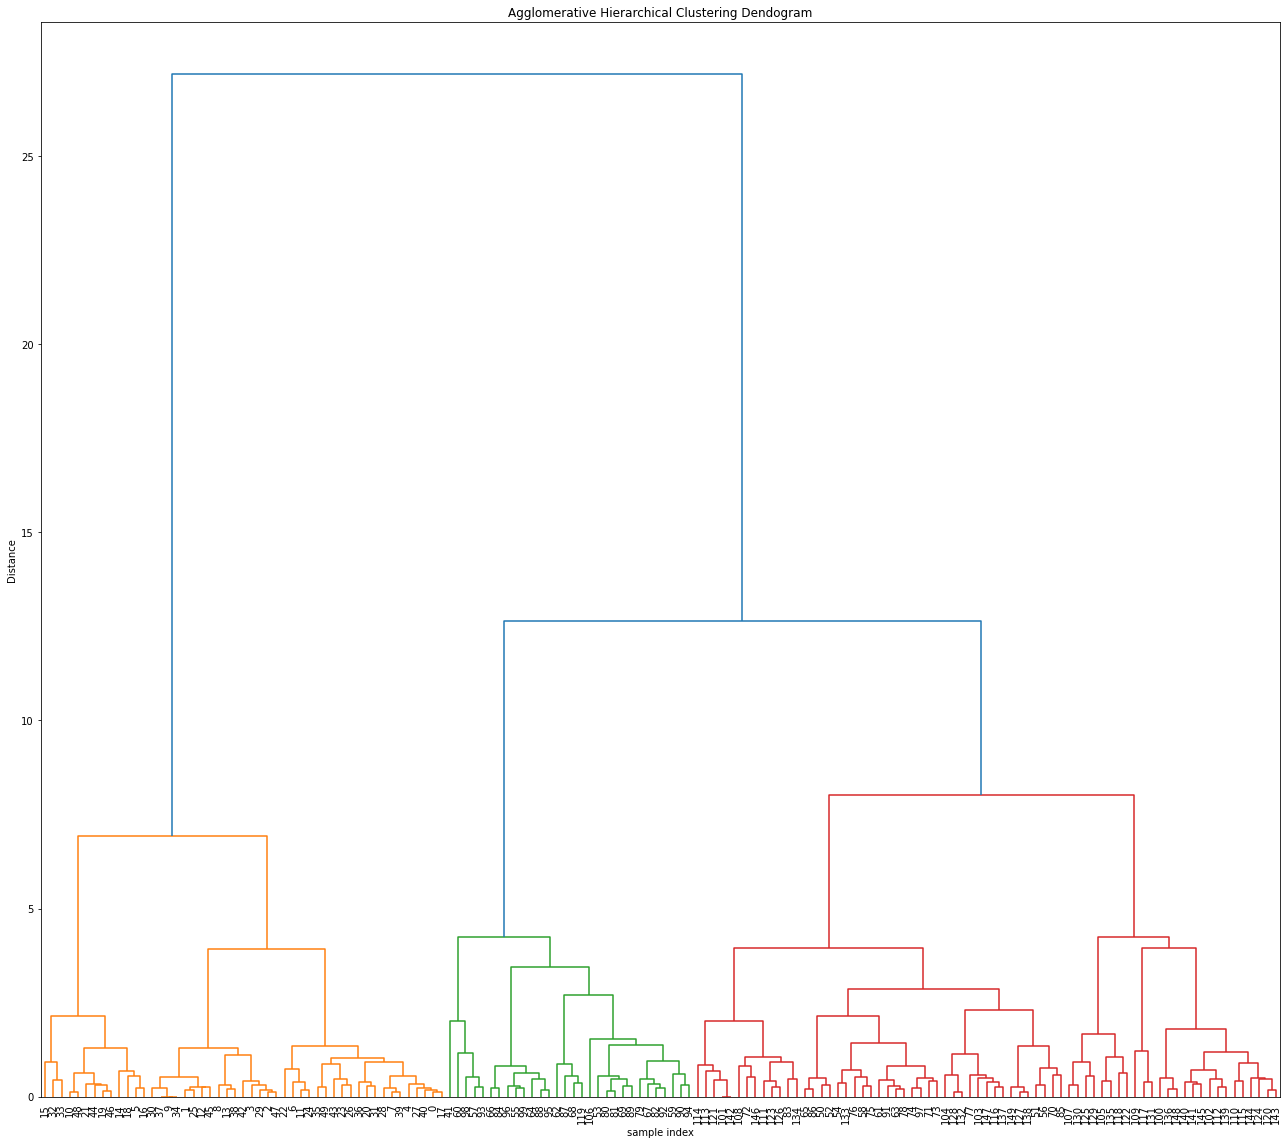

In [32]:
#Visualisation in the form of dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()